In [23]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [24]:
data_f2 = pd.read_csv(r"example_f_2.csv")
data_f3 = pd.read_csv(r"example_f_3.csv")

# Local Outlier Factor

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. 

The number of neighbors considered (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers.

<AxesSubplot:xlabel='f1', ylabel='f2'>

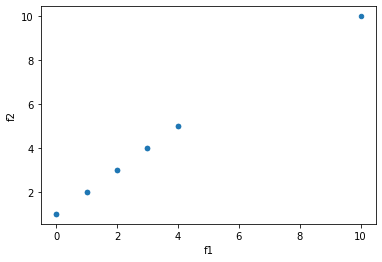

In [25]:
data_f2.plot.scatter(x='f1', y='f2')

In [26]:
from sklearn.neighbors import LocalOutlierFactor

In [35]:
clf = LocalOutlierFactor(n_neighbors=1, contamination=0.1)

In [36]:
y_pred = clf.fit_predict(data_f2)
X_scores = clf.negative_outlier_factor_

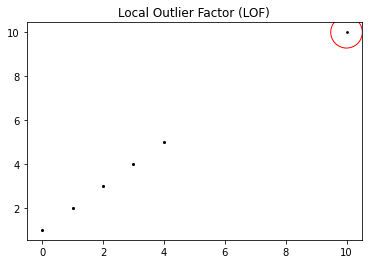

In [37]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(data_f2.iloc[:, 0], data_f2.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    data_f2.iloc[:, 0],
    data_f2.iloc[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)

## Example explanation

LOF is really good when there are clusters of points. This example is not great but is good to visualize. In this case lof considers everything  that doesnt have at least one neighbor. For each point it finds the neighbor points in a range.